In [484]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bd = pd.read_csv('2013-2014.csv')
n = bd.last_valid_index()

In [485]:
PARAMETRES = ['FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','SJH','SJD','SJA','VCH','VCD','VCA','Bb1X2','BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA','BbOU','BbMx>2.5','BbAv>2.5','BbMx<2.5','BbAv<2.5','BbAH','BbAHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA','PSCH','PSCD','PSCA']

In [486]:
ENTREES = ['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','AwayTeam','HomeTeam']

In [487]:
SORTIES = ['FTR']

In [488]:
len(SORTIES)

1

In [489]:
bd.loc[bd['FTR'] == 'H',['FTR']] = float(1.0)
bd.loc[bd['FTR'] == 'D',['FTR']] = float(0.0)
bd.loc[bd['FTR'] == 'A',['FTR']] = float(0.0)
bd.loc[bd['HTR'] == 'H',['HTR']] = float(1.0)
bd.loc[bd['HTR'] == 'D',['HTR']] = float(0.0)
bd.loc[bd['HTR'] == 'A',['HTR']] = float(0.0)

In [490]:
for param in PARAMETRES :
    bd.loc[bd[param].isnull(),param] = np.round(bd[param].mean())

In [491]:
for i in range (n+1):
    l=0
    for r in range (0,len(bd['HomeTeam'].iloc[i])):
        l =+ float(ord((bd['HomeTeam'].iloc[i])[r])*r)
    bd['HomeTeam'].iloc[i] = l

for i in range (n+1):
    l=0
    for r in range (0,len(bd['AwayTeam'].iloc[i])):
        l =+ float(ord((bd['AwayTeam'].iloc[i])[r])*r)
    bd['AwayTeam'].iloc[i] = l

C:\Users\Téo\AppData\Local\Temp\ipykernel_7792\2312141394.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bd['HomeTeam'].iloc[i] = l
C:\Users\Téo\AppData\Local\Temp\ipykernel_7792\2312141394.py:5: SettingWithCopyWarning: 
A value is tryi

In [492]:
bd.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
           ..
BbMxAHA     0
BbAvAHA     0
PSCH        0
PSCD        0
PSCA        0
Length: 67, dtype: int64

In [493]:
for i in range (1,n+1):
    home = bd['HomeTeam'].iloc[i]
    away = bd['AwayTeam'].iloc[i]
    for j in [4,7,10,12] :
        param = bd.columns[j]
        bd[param].iloc[i] = np.round(bd[param].loc[bd['HomeTeam'] == home].iloc[0:i].mean(),4)
    for j in [5,8,11,13] :
        param = bd.columns[j]
        bd[param].iloc[i] = np.round(bd[param].loc[bd['AwayTeam'] == away].iloc[0:i].mean(),4)

C:\Users\Téo\AppData\Local\Temp\ipykernel_7792\3356957890.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bd[param].iloc[i] = np.round(bd[param].loc[bd['HomeTeam'] == home].iloc[0:i].mean(),4)
C:\Users\Téo\AppData\Local\Temp\ipykernel_77

In [494]:
bd = bd.sample(frac=1, random_state=217)

In [495]:
X_entrainement = bd[ENTREES][:int(n*0.8)]
Y_entrainement = bd[SORTIES][:int(n*0.8)].values
X_essai = bd[ENTREES][int(n*0.8):]
Y_essai = bd[SORTIES][int(n*0.8):].values

In [496]:
def entropie(p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return (- (p * np.log2(p) + (1 - p) * np.log2(1-p)))

def gain_information(enfant_gauche, enfant_droit):
    parent = enfant_gauche + enfant_droit
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0
    p_gauche = enfant_gauche.count(1) / len(enfant_gauche) if len(enfant_gauche) > 0 else 0
    p_droit = enfant_droit.count(1) / len(enfant_droit) if len(enfant_droit) > 0 else 0
    GI_p = entropie(p_parent)
    GI_g = entropie(p_gauche)
    GI_d = entropie(p_droit)
    return GI_p - (len(enfant_gauche) / len(parent) * GI_g) - (len(enfant_droit) / len(parent) * GI_d)

In [497]:
def arbre_prediction(arbre, X_essai):
    ind_parametre = arbre['ind_parametre']

    if X_essai[ind_parametre] <= arbre['point_separation']:
        if type(arbre['coupe_gauche']) == dict:
            return arbre_prediction(arbre['coupe_gauche'], X_essai)
        else:
            valeur = arbre['coupe_gauche']
            return valeur
    else:
        if type(arbre['coupe_droite']) == dict:
            return arbre_prediction(arbre['coupe_droite'], X_essai)
        else:
            return arbre['coupe_droite']

In [498]:
def affichage_amorce(X_entrainement, Y_entrainement):
    indices_amorce = list(np.random.choice(range(len(X_entrainement)), len(X_entrainement), replace = True))
    indices_hb = [i for i in range(len(X_entrainement)) if i not in indices_amorce]
    X_amorce = X_entrainement.iloc[indices_amorce].values
    Y_amorce = Y_entrainement[indices_amorce]
    X_hb = X_entrainement.iloc[indices_hb].values
    Y_hb = Y_entrainement[indices_hb]
    return X_amorce, Y_amorce, X_hb, Y_hb

def score_hb(arbre, X_essai, Y_essai):
    score = 0
    for i in range(len(X_essai)):
        pred = arbre_prediction(arbre, X_essai[i])
        if pred != Y_essai[i]:
            score += 1
    return score / len(X_essai)

In [499]:
def trouver_point_separation(X_amorce, Y_amorce, nb_max_parametres):
    liste_parametres = list()
    nombre_parametres = len(X_amorce[0])

    while len(liste_parametres) <= nb_max_parametres:
        ind_parametre = random.sample(range(nombre_parametres), 1)
        if ind_parametre not in liste_parametres:
            liste_parametres.extend(ind_parametre)

    meilleur_gain_info = -999
    noeud = None
    for ind_parametre in liste_parametres:
        for point_separation in X_amorce[:,ind_parametre]:
            enfant_gauche = {'X_amorce': [], 'Y_amorce': []}
            enfant_droit = {'X_amorce': [], 'Y_amorce': []}

            # division des enfants pour les variables continues
            if type(point_separation) in [int, float]:
                for i, valeur in enumerate(X_amorce[:,ind_parametre]):
                    if valeur <= point_separation:
                        enfant_gauche['X_amorce'].append(X_amorce[i])
                        enfant_gauche['Y_amorce'].append(Y_amorce[i])
                    else:
                        enfant_droit['X_amorce'].append(X_amorce[i])
                        enfant_droit['Y_amorce'].append(Y_amorce[i])
            # division des enfants pour les variables catégoriques
            else:
                for i, valeur in enumerate(X_amorce[:,ind_parametre]):
                    if valeur == point_separation:
                        enfant_gauche['X_amorce'].append(X_amorce[i])
                        enfant_gauche['Y_amorce'].append(Y_amorce[i])
                    else:
                        enfant_droit['X_amorce'].append(X_amorce[i])
                        enfant_droit['Y_amorce'].append(Y_amorce[i])

            gain_info_coupe = gain_information(enfant_gauche['Y_amorce'], enfant_droit['Y_amorce'])
            if gain_info_coupe > meilleur_gain_info:
                meilleur_gain_info = gain_info_coupe
                enfant_gauche['X_amorce'] = np.array(enfant_gauche['X_amorce'])
                enfant_droit['X_amorce'] = np.array(enfant_droit['X_amorce'])
                noeud = {'gain_information': gain_info_coupe,
                        'enfant_gauche': enfant_gauche,
                        'enfant_droit': enfant_droit,
                        'point_separation': point_separation,
                        'ind_parametre': ind_parametre}
    return noeud

In [500]:
def noeud_terminal(noeud):
    Y_amorce = noeud['Y_amorce']
    pred = max(Y_amorce, key = Y_amorce.count)
    return pred

In [501]:
def division_noeud(noeud, nb_max_parametres, nmb_division_min, profondeur_max, profondeur):
    enfant_gauche = noeud['enfant_gauche']
    enfant_droit = noeud['enfant_droit']

    del(noeud['enfant_gauche'])
    del(noeud['enfant_droit'])

    if len(enfant_gauche['Y_amorce']) == 0 or len(enfant_droit['Y_amorce']) == 0:
        enfant_vide = {'Y_amorce': enfant_gauche['Y_amorce'] + enfant_droit['Y_amorce']}
        noeud['coupe_gauche'] = noeud_terminal(enfant_vide)
        noeud['coupe_droite'] = noeud_terminal(enfant_vide)
        return noeud

    if profondeur >= profondeur_max:
        noeud['coupe_gauche'] = noeud_terminal(enfant_gauche)
        noeud['coupe_droite'] = noeud_terminal(enfant_droit)
        return noeud

    if len(enfant_gauche['X_amorce']) <= nmb_division_min:
        noeud['coupe_gauche'] = noeud['coupe_droite'] = noeud_terminal(enfant_gauche)
    else:
        noeud['coupe_gauche'] = trouver_point_separation(enfant_gauche['X_amorce'], enfant_gauche['Y_amorce'], nb_max_parametres)
        division_noeud(noeud['coupe_gauche'], profondeur_max, nmb_division_min, profondeur_max, profondeur + 1)
    if len(enfant_droit['X_amorce']) <= nmb_division_min:
        noeud['coupe_droite'] = noeud['coupe_gauche'] = noeud_terminal(enfant_droit)
    else:
        noeud['coupe_droite'] = trouver_point_separation(enfant_droit['X_amorce'], enfant_droit['Y_amorce'], nb_max_parametres)
        division_noeud(noeud['coupe_droite'], nb_max_parametres, nmb_division_min, profondeur_max, profondeur + 1)

In [502]:
def construction_arbre(X_amorce, Y_amorce, profondeur_max, nmb_division_min, nb_max_parametres):
    racine = trouver_point_separation(X_amorce, Y_amorce, nb_max_parametres)
    division_noeud(racine, nb_max_parametres, nmb_division_min, profondeur_max, 1)
    return racine

def foret_aleatoire(X_entrainement, Y_entrainement, nmb_arbres, nb_max_parametres, profondeur_max, nmb_division_min):
    liste_arbres = list()
    hb_arbres = list()
    for i in range(nmb_arbres):
        X_amorce, Y_amorce, X_hb, Y_hb = affichage_amorce(X_entrainement, Y_entrainement)
        arbre = construction_arbre(X_amorce, Y_amorce, nb_max_parametres, profondeur_max, nmb_division_min)
        liste_arbres.append(arbre)
        erreur_hb = score_hb(arbre, X_hb, Y_hb)
        hb_arbres.append(erreur_hb)
    print("Estimation hors boîte : {:.2f}".format(np.mean(hb_arbres)))
    return liste_arbres

In [503]:
def prediction(liste_arbres, X_essai):
    liste_prediction = list()
    for i in range(len(X_essai)):
        ensemble_preds = [arbre_prediction(arbre, X_essai.values[i]) for arbre in liste_arbres]
        pred_finale = max(ensemble_preds, key = ensemble_preds.count)
        liste_prediction.append(pred_finale)
    return np.array(liste_prediction)

In [504]:
nmb_arbres = 150
nb_max_parametres = 6
profondeur_max = 15
nmb_division_min = 3

In [505]:
modele = foret_aleatoire(X_entrainement, Y_entrainement, nmb_arbres=150, nb_max_parametres=6, profondeur_max=15, nmb_division_min=3)

Estimation hors boîte : 0.48


In [506]:
resultats = prediction(modele,X_essai)

In [507]:
print(np.round(sum(resultats == Y_essai) / len(Y_essai),2)*100)

[65.]


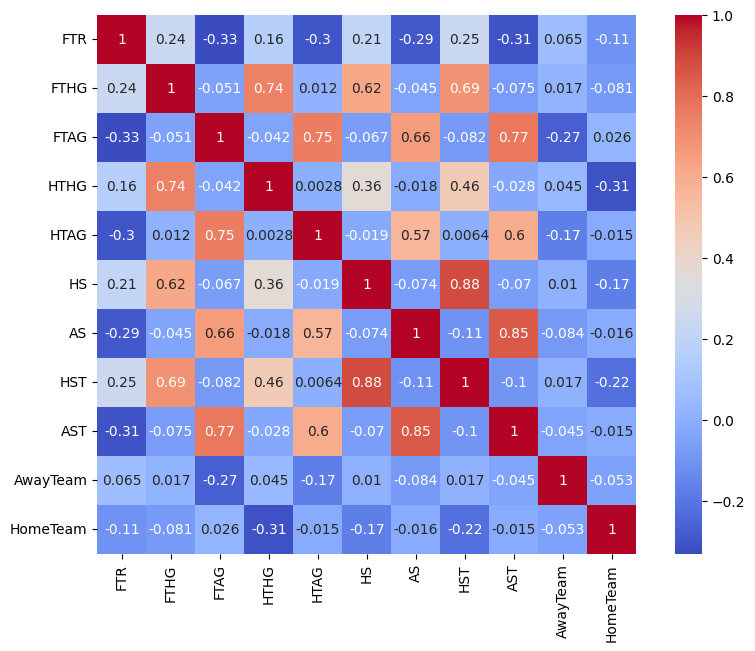

In [508]:
# Calculer les coefficients de corrélation
corr_matrice = bd[['FTR','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','AwayTeam','HomeTeam']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrice, annot=True, cmap='coolwarm', square=True)
plt.show()

In [509]:
# Calculer les coefficients de confusion
conf_matrice = confusion_matrix(y_true=Y_essai.tolist(), y_pred=resultats.tolist())
print(conf_matrice)

[[33 13]
 [14 17]]
